## Univariate Linear Regression Report

#### 1. Framing the Problem - A given California district and some summary stats about them based on the 1990 census data. Will be training a first machine learning model - a univariate linear regression model.

#### 2. Obtaining the Data

Source: Downloaded from https://www.kaggle.com/datasets/camnugent/california-housing-prices 

In [73]:
import pandas as pd
df = pd.read_csv('data/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Exploratory Data Analysis (EDA)


In [74]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model 
model = linear_model.LinearRegression()

<Axes: xlabel='median_income', ylabel='median_house_value'>

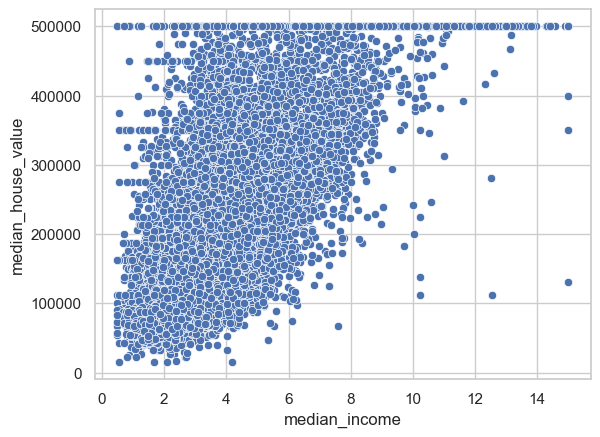

In [76]:
sns.scatterplot(data = df,x="median_income", y="median_house_value")

<Axes: xlabel='population', ylabel='median_house_value'>

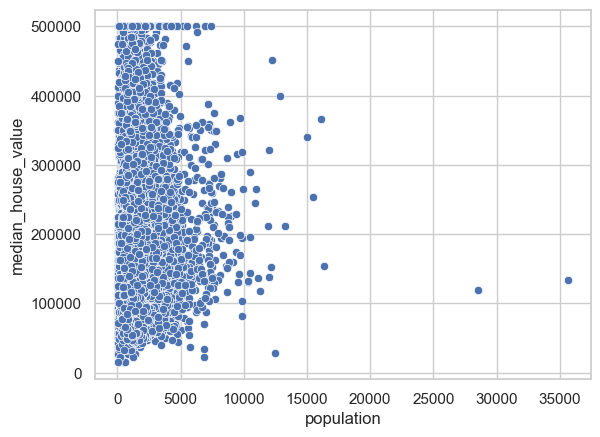

In [77]:
sns.scatterplot(data = df,x="population", y="median_house_value")

<Axes: xlabel='households', ylabel='median_house_value'>

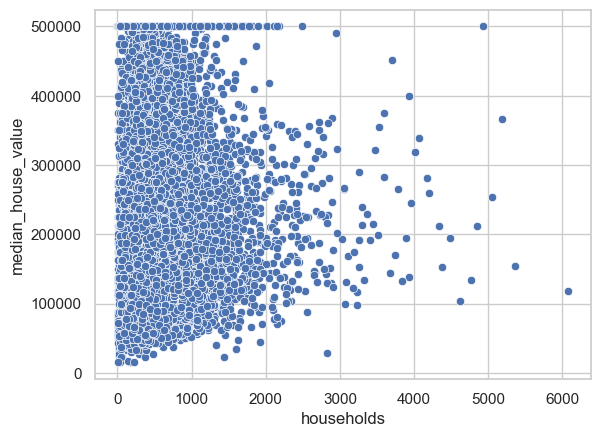

In [78]:
sns.scatterplot(data = df,x="households", y="median_house_value")

#### 4. Running linear regressions (fitting between) on three models

#### Model 1

In [79]:
model = linear_model.LinearRegression()

In [80]:
model.fit(X=df[["median_income"]], y=df[["median_house_value"]])

LinearRegression()

#### Ploting the resulting line on top of the scatter data

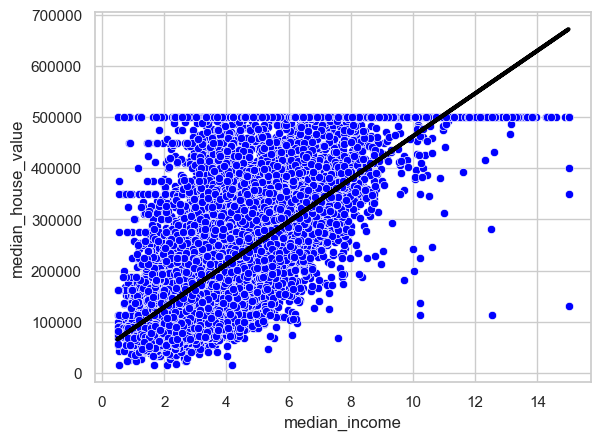

In [94]:

sns.scatterplot(x="median_income", y="median_house_value", data=df, color="blue")
plt.plot(df[["median_income"]], model.predict(df[["median_income"]]), color="black", linewidth=3)
plt.show()

In [82]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: [45085.57670327]
Coefficients: [[41793.8492019]]


In [83]:
print(f"Mean squared error: {mean_squared_error(df[['median_house_value']], model.predict(df[['median_income']]))}")
print(f"Mean absolute error: {mean_absolute_error(df[['median_house_value']], model.predict(df[['median_income']]))}")

Mean squared error: 7011311502.929527
Mean absolute error: 62625.9337911434


#### Insights on the graph : The intercept suggests that even with zero median income, there is a base value for median house value.The positive slope indicates a strong positive correlation between median income and median house value.The relatively low MSE and MAE suggest a good fit of the model.

### Model - 2

In [84]:
model2 = linear_model.LinearRegression()

In [85]:
model2.fit(X=df[["population"]], y=df[["median_house_value"]])

LinearRegression()

#### Ploting the resulting line on top of the scatter data

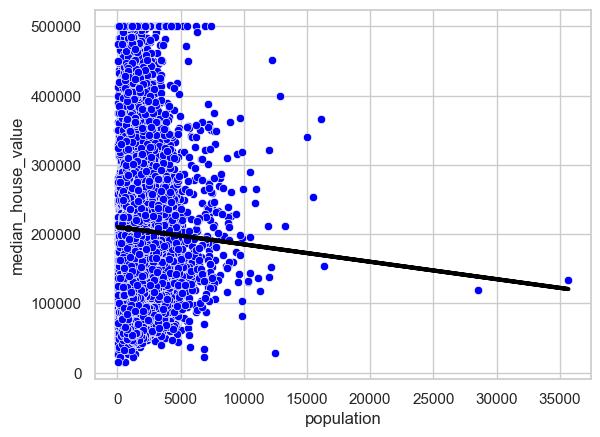

In [86]:
sns.scatterplot(x="population", y="median_house_value", data=df, color="blue")
plt.plot(df[["population"]], model2.predict(df[["population"]]), color="black", linewidth=3)
plt.show()

In [87]:
print(f"Intercept: {model2.intercept_}")
print(f"Coefficients: {model2.coef_}")

Intercept: [210436.26207627]
Coefficients: [[-2.51175277]]


In [88]:
print(f"Mean squared error: {mean_squared_error(df[['median_house_value']], model2.predict(df[['population']]))}")
print(f"Mean absolute error: {mean_absolute_error(df[['median_house_value']], model2.predict(df[['population']]))}")

Mean squared error: 13307412412.389355
Mean absolute error: 91153.82009473183


#### Insights on the graph : The intercept indicates a base value for median house value when population is zero.The negative slope suggests a weak or no clear linear correlation with population.The high MSE and MAE indicate poor model performance, likely due to the scattered distribution observed in the scatter plot.


#### Model 3

In [89]:
model3 = linear_model.LinearRegression()

In [90]:
model3.fit(X=df[["households"]], y=df[["median_house_value"]])

LinearRegression()

#### Ploting the resulting line on top of the scatter data

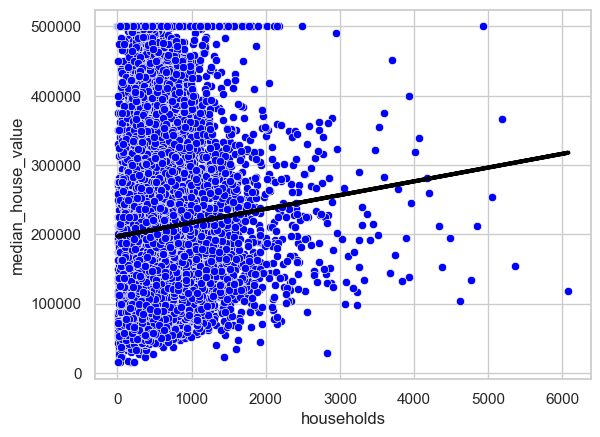

In [91]:
sns.scatterplot(x="households", y="median_house_value", data=df, color="blue")
plt.plot(df[["households"]], model3.predict(df[["households"]]), color="black", linewidth=3)
plt.show()

In [92]:
print(f"Intercept: {model3.intercept_}")
print(f"Coefficients: {model3.coef_}")

Intercept: [196928.57716233]
Coefficients: [[19.87277516]]


In [93]:
print(f"Mean squared error: {mean_squared_error(df[['median_house_value']], model3.predict(df[['households']]))}")
print(f"Mean absolute error: {mean_absolute_error(df[['median_house_value']], model3.predict(df[['households']]))}")

Mean squared error: 13257776904.728533
Mean absolute error: 90802.74324318448


#### Insights on the graph : The intercept suggests a base value for median house value when the number of households is zero.The positive slope indicates a positive correlation between the number of households and median house value.The moderate MSE and MAE suggest a reasonable fit, though not as strong as Model 1.

## 5. Summary Table Of Three Models

| model_name  | Intercept  | Coefficients  | MSE  | MAE  |
|---|---|---|---|---|
| model  | 45085.57  | 41793.84  | 7011311502.92  | 62625.933  |
| model2  | 210436.26  | -2.511752  | 13307412412.389  | 91153.8200  |
|  model3 |  196928.57 | 19.87277  | 13257776904.72  | 90802.74  |

##  Conclusion

##### In summary, three linear regression models were built to predict median house value in the California Housing Prices dataset. Model 1, based on median income, exhibited a strong positive correlation with low errors. Models 2 and 3, using population and the number of households, showed weaker correlations and higher errors. Feature selection significantly impacted model performance, emphasizing the importance of choosing relevant predictors for accurate predictions. Further exploration and advanced modeling techniques may enhance overall accuracy.